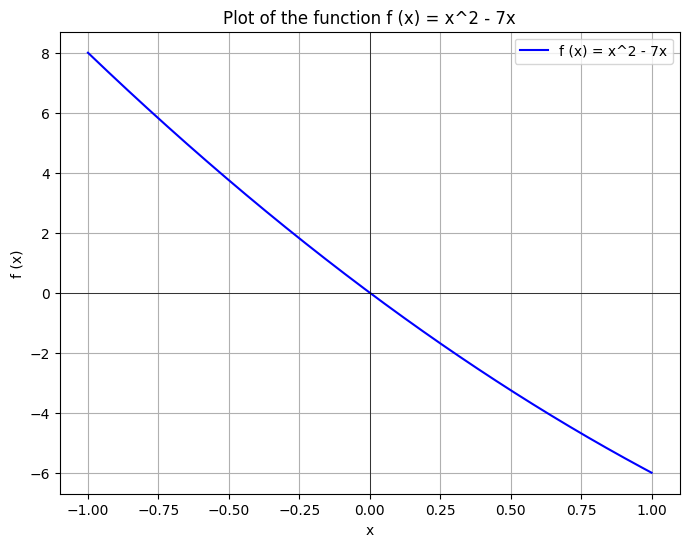

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 7*x

x = np.linspace(-1, 1, 400)


y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f (x) = x^2 - 7x', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of the function f (x) = x^2 - 7x')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.grid(True)
plt.legend()
plt.show()

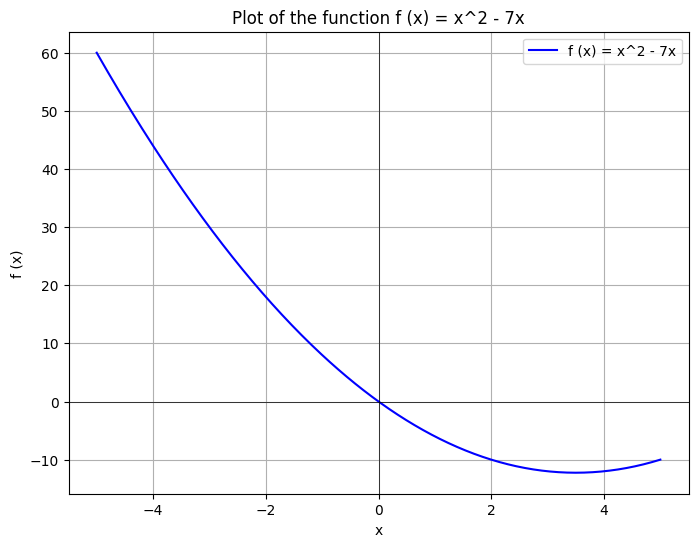

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 7*x

x = np.linspace(-5, 5, 400)


y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f (x) = x^2 - 7x', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of the function f (x) = x^2 - 7x')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.grid(True)
plt.legend()
plt.show()

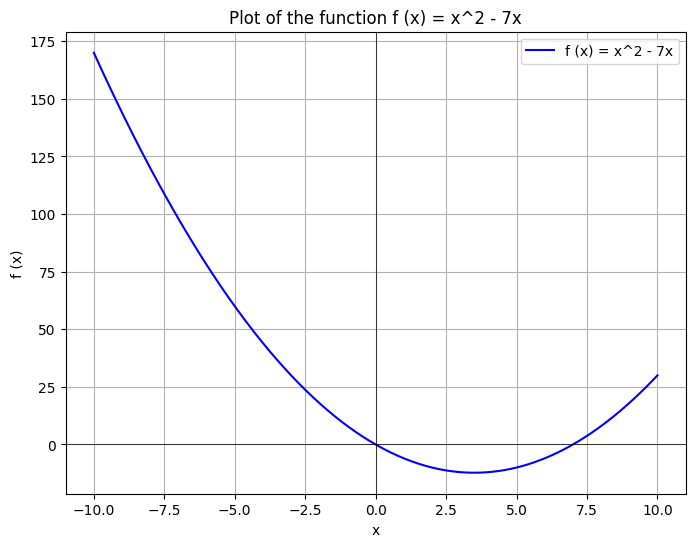

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 7*x

x = np.linspace(-10, 10, 400)


y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f (x) = x^2 - 7x', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of the function f (x) = x^2 - 7x')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.grid(True)
plt.legend()
plt.show()